# Demonstration of SplitWavePy using microseismic data

Import statements.

In [1]:

import splitwavepy as sw
from obspy import read



I have some data stored on disk in SAC format, use obspy to read it in.

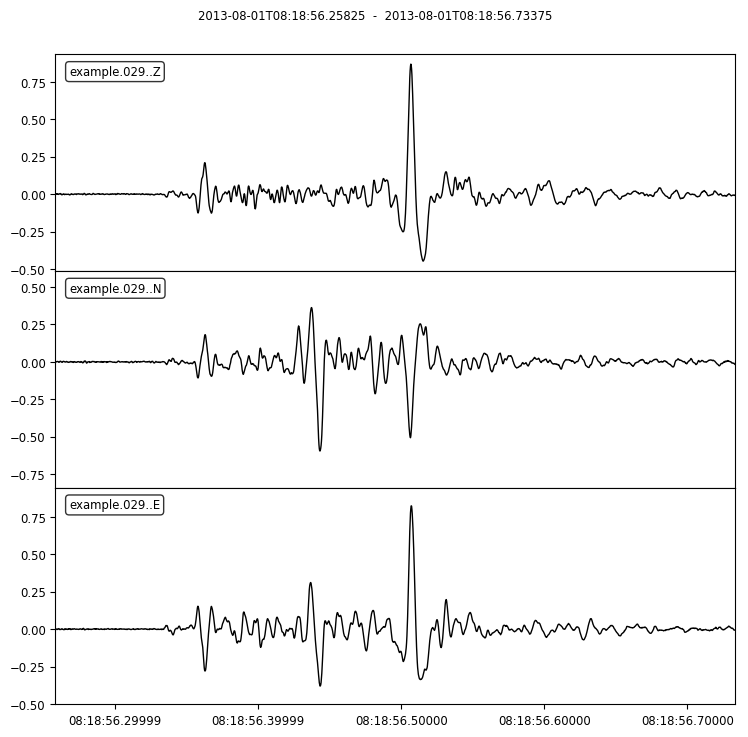

In [2]:
# OBSPY
st = read('data/toshow*')
st.plot()

Read the data into a SplitWavePy "Trio" object.

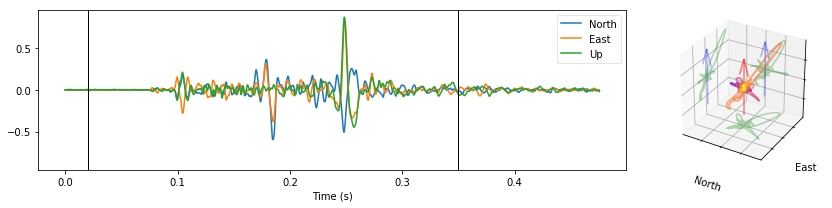

In [3]:
delta = st[0].stats.delta
t = sw.Trio(st[1].data,st[0].data, st[2].data,delta=delta)
t.set_window(0.02,0.35)
t.plot()

Focus in on the P - arrival.

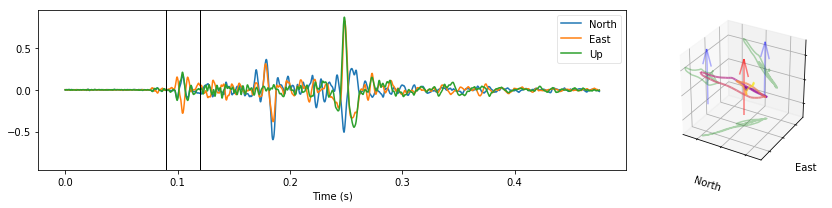

In [73]:
t.set_window(0.09,0.12)
t.plot()

Rotate the traces to line up on the P particle motion.

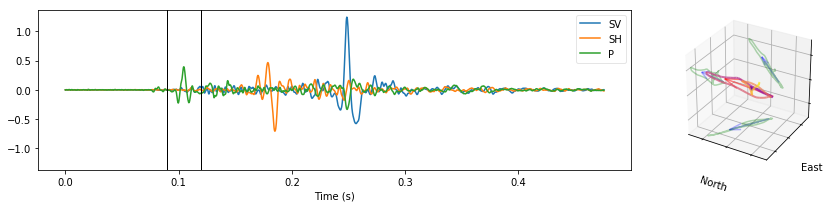

In [74]:
t.p_rotate()
t.plot()

Focus in on the shear energy.

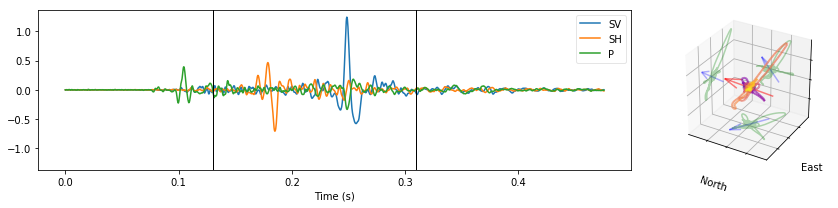

In [75]:
t.set_window(0.13,0.31)
t.plot()

In [76]:
m = sw.Eig3dM(t,lags=(0.1,))

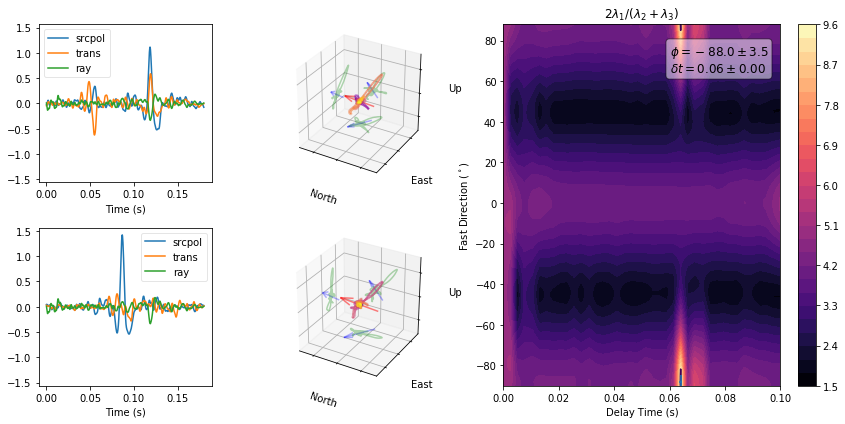

In [77]:
m.plot()

-64.8321298502184 66.53938078600643


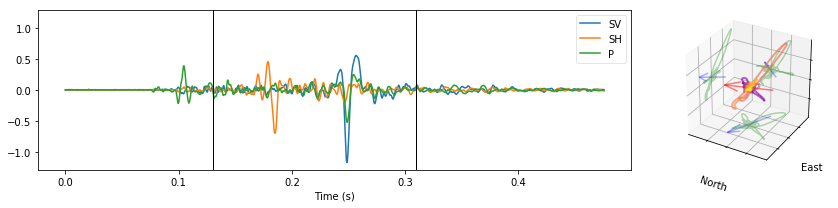

In [78]:
# get event info
import math
from operator import itemgetter
keys = ['evla', 'evlo', 'evdp','stla','stlo','stdp']
evla, evlo, evdp, stla, stlo, stdp = itemgetter(*keys)(st[0].stats.sac)

dlo = stlo - evlo
dla = stla - evla
dz = evdp - stdp

azi = math.degrees( math.atan2( dlo, dla))
inc = math.degrees( math.atan2( (dlo**2+dla**2)**.5, dz))

print(azi,inc)

t.set_ray(azi,inc)
t.rotate2ray()
t.plot()

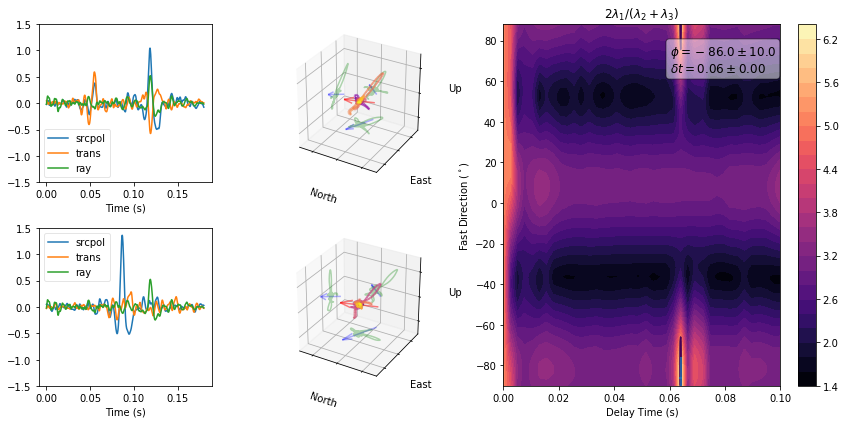

In [79]:
n = sw.Eig3dM(t,lags=(0.1,))
n.plot()